## Uczenie maszynowe UMZ 2018/2019
### 31 marca 2020
# 4. Metody ewaluacji

## 4.1. Metodologia testowania

W uczeniu maszynowym bardzo ważna jest ewaluacja budowanego modelu. Dlatego dobrze jest podzielić posiadane dane na odrębne zbiory – osobny zbiór danych do uczenia i osobny do testowania. W niektórych przypadkach potrzeba będzie dodatkowo wyodrębnić tzw. zbiór walidacyjny.

### Zbiór uczący a zbiór testowy

* Na zbiorze uczącym (treningowym) uczymy algorytmy, a na zbiorze testowym sprawdzamy ich poprawność.
* Zbiór uczący powinien być kilkukrotnie większy od testowego (np. 4:1, 9:1 itp.).
* Zbiór testowy często jest nieznany.
* Należy unikać mieszania danych testowych i treningowych – nie wolno „zanieczyszczać” danych treningowych danymi testowymi!

Czasami potrzebujemy dobrać parametry modelu, np. $\alpha$ – który zbiór wykorzystać do tego celu?

### Zbiór walidacyjny

Do doboru parametrów najlepiej użyć jeszcze innego zbioru – jest to tzw. **zbiór walidacyjny**

 * Zbiór walidacyjny powinien mieć wielkość zbliżoną do wielkości zbioru testowego, czyli np. dane można podzielić na te trzy zbiory w proporcjach 3:1:1, 8:1:1 itp.

### Walidacja krzyżowa

Którą część danych wydzielić jako zbiór walidacyjny tak, żeby było „najlepiej”?

 * Niech każda partia danych pełni tę rolę naprzemiennie!

<img width="100%" src="https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png"/>
Żródło: https://chrisjmccormick.wordpress.com/2013/07/31/k-fold-cross-validation-with-matlab-code/

### Walidacja krzyżowa

* Podziel dane $D = \left\{ (x^{(1)}, y^{(1)}), \ldots, (x^{(m)}, y^{(m)})\right\} $ na $N$ rozłącznych zbiorów $T_1,\ldots,T_N$
* Dla $i=1,\ldots,N$, wykonaj:
    * Użyj $T_i$ do walidacji i zbiór $S_i$ do trenowania, gdzie $S_i = D \smallsetminus T_i$. 
    * Zapisz model $\theta_i$.
* Akumuluj wyniki dla modeli $\theta_i$ dla zbiorów $T_i$.
* Ustalaj parametry uczenia na akumulowanych wynikach.

### Walidacja krzyżowa – wskazówki

* Zazwyczaj ustala się $N$ w przedziale od $4$ do $10$, tzw. $N$-krotna walidacja krzyżowa (_$N$-fold cross validation_). 
* Zbiór $D$ warto zrandomizować przed podziałem.
* W jaki sposób akumulować wyniki dla wszystkich zbiórow $T_i$?
* Po ustaleniu parametrów dla każdego $T_i$, trenujemy model na całych danych treningowych z ustalonymi parametrami.
* Testujemy na zbiorze testowym (jeśli nim dysponujemy).

### _Leave-one-out_

Jest to szczególny przypadek walidacji krzyżowej, w której $N = m$.

* Jaki jest rozmiar pojedynczego zbioru $T_i$?
* Jakie są zalety i wady tej metody?
* Kiedy może być przydatna?

### Zbiór walidujący a algorytmy optymalizacji

* Gdy błąd rośnie na zbiorze uczącym, mamy źle dobrany parametr $\alpha$. Należy go wtedy zmniejszyć.
* Gdy błąd zmniejsza się na zbiorze trenującym, ale rośnie na zbiorze walidującym, mamy do czynienia ze zjawiskiem **nadmiernego dopasowania** (_overfitting_).
* Należy wtedy przerwać optymalizację. Automatyzacja tego procesu to _early stopping_.

## 4.2. Miary jakości

Aby przeprowadzić ewaluację modelu, musimy wybrać **miarę** (**metrykę**), jakiej będziemy używać.

Jakiej miary użyc najlepiej?
 * To zależy od rodzaju zadania.
 * Innych metryk używa się do regresji, a innych do klasyfikacji

### Metryki dla zadań regresji

Dla zadań regresji możemy zastosować np.:
 * błąd średniokwadratowy (*root-mean-square error*, RMSE):
   $$ \mathrm{RMSE} \, = \, \sqrt{ \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 } $$
 * średni błąd bezwzględny (*mean absolute error*, MAE):
   $$ \mathrm{MAE} \, = \, \frac{1}{m} \sum_{i=1}^{m} \left| \hat{y}^{(i)} - y^{(i)} \right| $$

W powyższych wzorach $y^{(i)}$ oznacza **oczekiwaną** wartości zmiennej $y$ w $i$-tym przykładzie, a $\hat{y}^{(i)}$ oznacza wartość zmiennej $y$ w $i$-tym przykładzie wyliczoną (**przewidzianą**) przez nasz model.

### Metryki dla zadań klasyfikacji

Aby przedstawić kilka najpopularniejszych metryk stosowanych dla zadań klasyfikacyjnych, posłużmy się następującym przykładem:

In [1]:
# Przydatne importy

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas
import random
import seaborn

%matplotlib inline

In [2]:
def powerme(x1,x2,n):
    """Funkcja, która generuje n potęg dla zmiennych x1 i x2 oraz ich iloczynów"""
    X = []
    for m in range(n+1):
        for i in range(m+1):
            X.append(np.multiply(np.power(x1,i),np.power(x2,(m-i))))
    return np.hstack(X)

In [3]:
def plot_data_for_classification(X, Y, xlabel=None, ylabel=None, Y_predicted=[], highlight=None):
    """Wykres danych dla zadania klasyfikacji"""
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    X = X.tolist()
    Y = Y.tolist()
    X1n = [x[1] for x, y in zip(X, Y) if y[0] == 0]
    X1p = [x[1] for x, y in zip(X, Y) if y[0] == 1]
    X2n = [x[2] for x, y in zip(X, Y) if y[0] == 0]
    X2p = [x[2] for x, y in zip(X, Y) if y[0] == 1]
    
    if len(Y_predicted) > 0:
        Y_predicted = Y_predicted.tolist()
        X1tn = [x[1] for x, y, yp in zip(X, Y, Y_predicted) if y[0] == 0 and yp[0] == 0]
        X1fn = [x[1] for x, y, yp in zip(X, Y, Y_predicted) if y[0] == 1 and yp[0] == 0]
        X1tp = [x[1] for x, y, yp in zip(X, Y, Y_predicted) if y[0] == 1 and yp[0] == 1]
        X1fp = [x[1] for x, y, yp in zip(X, Y, Y_predicted) if y[0] == 0 and yp[0] == 1]
        X2tn = [x[2] for x, y, yp in zip(X, Y, Y_predicted) if y[0] == 0 and yp[0] == 0]
        X2fn = [x[2] for x, y, yp in zip(X, Y, Y_predicted) if y[0] == 1 and yp[0] == 0]
        X2tp = [x[2] for x, y, yp in zip(X, Y, Y_predicted) if y[0] == 1 and yp[0] == 1]
        X2fp = [x[2] for x, y, yp in zip(X, Y, Y_predicted) if y[0] == 0 and yp[0] == 1]
    
        if highlight == 'tn':
            ax.scatter(X1tn, X2tn, c='r', marker='x', s=100, label='Dane')
            ax.scatter(X1fn, X2fn, c='k', marker='o', s=50, label='Dane')
            ax.scatter(X1tp, X2tp, c='k', marker='o', s=50, label='Dane')
            ax.scatter(X1fp, X2fp, c='k', marker='x', s=50, label='Dane')
        elif highlight == 'fn':
            ax.scatter(X1tn, X2tn, c='k', marker='x', s=50, label='Dane')
            ax.scatter(X1fn, X2fn, c='g', marker='o', s=100, label='Dane')
            ax.scatter(X1tp, X2tp, c='k', marker='o', s=50, label='Dane')
            ax.scatter(X1fp, X2fp, c='k', marker='x', s=50, label='Dane')
        elif highlight == 'tp':
            ax.scatter(X1tn, X2tn, c='k', marker='x', s=50, label='Dane')
            ax.scatter(X1fn, X2fn, c='k', marker='o', s=50, label='Dane')
            ax.scatter(X1tp, X2tp, c='g', marker='o', s=100, label='Dane')
            ax.scatter(X1fp, X2fp, c='k', marker='x', s=50, label='Dane')
        elif highlight == 'fp':
            ax.scatter(X1tn, X2tn, c='k', marker='x', s=50, label='Dane')
            ax.scatter(X1fn, X2fn, c='k', marker='o', s=50, label='Dane')
            ax.scatter(X1tp, X2tp, c='k', marker='o', s=50, label='Dane')
            ax.scatter(X1fp, X2fp, c='r', marker='x', s=100, label='Dane')
        else:
            ax.scatter(X1tn, X2tn, c='r', marker='x', s=50, label='Dane')
            ax.scatter(X1fn, X2fn, c='g', marker='o', s=50, label='Dane')
            ax.scatter(X1tp, X2tp, c='g', marker='o', s=50, label='Dane')
            ax.scatter(X1fp, X2fp, c='r', marker='x', s=50, label='Dane')

    else:
        ax.scatter(X1n, X2n, c='r', marker='x', s=50, label='Dane')
        ax.scatter(X1p, X2p, c='g', marker='o', s=50, label='Dane')
    
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
        
    ax.margins(.05, .05)
    return fig

In [4]:
# Wczytanie danych
import pandas
import numpy as np

alldata = pandas.read_csv('data-metrics.tsv', sep='\t')
data = np.matrix(alldata)

m, n_plus_1 = data.shape
n = n_plus_1 - 1

X2 = powerme(data[:, 1], data[:, 2], n)
Y2 = np.matrix(data[:, 0]).reshape(m, 1)

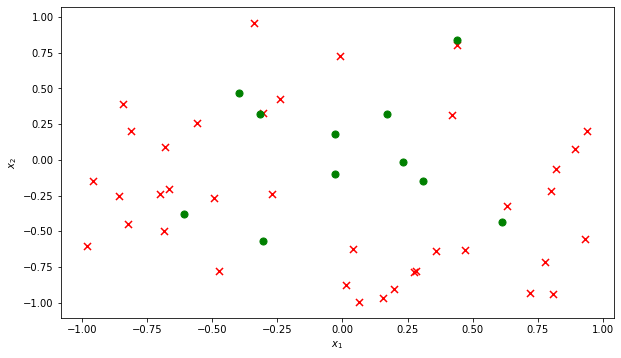

In [5]:
fig = plot_data_for_classification(X2, Y2, xlabel=r'$x_1$', ylabel=r'$x_2$')

In [6]:
def safeSigmoid(x, eps=0):
    """Funkcja sigmoidalna zmodyfikowana w taki sposób, 
    żeby wartości zawsz były odległe od asymptot o co najmniej eps
    """
    y = 1.0/(1.0 + np.exp(-x))
    if eps > 0:
        y[y < eps] = eps
        y[y > 1 - eps] = 1 - eps
    return y

def h(theta, X, eps=0.0):
    """Funkcja hipotezy (regresja logistyczna)"""
    return safeSigmoid(X*theta, eps)

def J(h,theta,X,y, lamb=0):
    """Funkcja kosztu dla regresji logistycznej"""
    m = len(y)
    f = h(theta, X, eps=10**-7)
    j = -np.sum(np.multiply(y, np.log(f)) + 
                np.multiply(1 - y, np.log(1 - f)), axis=0)/m
    if lamb > 0:
        j += lamb/(2*m) * np.sum(np.power(theta[1:],2))
    return j

def dJ(h,theta,X,y,lamb=0):
    """Gradient funkcji kosztu"""
    g = 1.0/y.shape[0]*(X.T*(h(theta,X)-y))
    if lamb > 0:
        g[1:] += lamb/float(y.shape[0]) * theta[1:] 
    return g

def classifyBi(theta, X):
    """Funkcja predykcji - klasyfikacja dwuklasowa"""
    prob = h(theta, X)
    return prob

In [7]:
def GD(h, fJ, fdJ, theta, X, y, alpha=0.01, eps=10**-3, maxSteps=10000):
    """Metoda gradientu prostego dla regresji logistycznej"""
    errorCurr = fJ(h, theta, X, y)
    errors = [[errorCurr, theta]]
    while True:
        # oblicz nowe theta
        theta = theta - alpha * fdJ(h, theta, X, y)
        # raportuj poziom błędu
        errorCurr, errorPrev = fJ(h, theta, X, y), errorCurr
        # kryteria stopu
        if abs(errorPrev - errorCurr) <= eps:
            break
        if len(errors) > maxSteps:
            break
        errors.append([errorCurr, theta]) 
    return theta, errors

In [8]:
# Uruchomienie metody gradientu prostego dla regresji logistycznej
theta_start = np.matrix(np.zeros(X2.shape[1])).reshape(X2.shape[1],1)
theta, errors = GD(h, J, dJ, theta_start, X2, Y2, 
                       alpha=0.1, eps=10**-7, maxSteps=10000)
print('theta = {}'.format(theta))

theta = [[ 1.37136167]
 [ 0.90128948]
 [ 0.54708112]
 [-5.9929264 ]
 [ 2.64435168]
 [-4.27978238]]


In [9]:
def plot_decision_boundary(fig, theta, X):
    """Wykres granicy klas"""
    ax = fig.axes[0]
    xx, yy = np.meshgrid(np.arange(-1.0, 1.0, 0.02),
                         np.arange(-1.0, 1.0, 0.02))
    l = len(xx.ravel())
    C = powerme(xx.reshape(l, 1), yy.reshape(l, 1), n)
    z = classifyBi(theta, C).reshape(int(np.sqrt(l)), int(np.sqrt(l)))

    plt.contour(xx, yy, z, levels=[0.5], lw=3);

In [10]:
Y_expected = Y2.astype(int)
Y_predicted = (classifyBi(theta, X2) > 0.5).astype(int)

In [11]:
# Przygotowanie interaktywnego wykresu

dropdown_highlight = widgets.Dropdown(options=['all', 'tp', 'fp', 'tn', 'fn'], value='all', description='highlight')

def interactive_classification(highlight):
    fig = plot_data_for_classification(X2, Y2, xlabel=r'$x_1$', ylabel=r'$x_2$',
                                       Y_predicted=Y_predicted, highlight=highlight)
    plot_decision_boundary(fig, theta, X2)

/home/pawel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'lw'
  # Remove the CWD from sys.path while we load stuff.


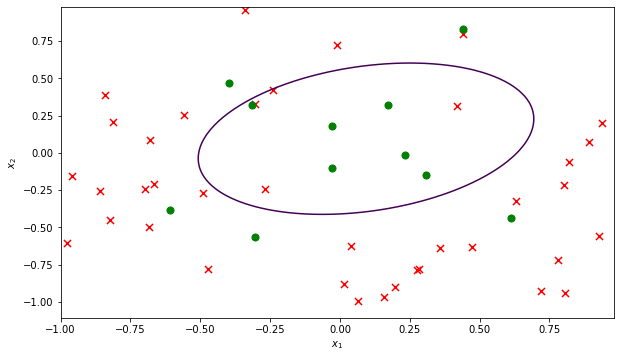

<function __main__.interactive_classification(highlight)>

In [12]:
widgets.interact(interactive_classification, highlight=dropdown_highlight)

Zadanie klasyfikacyjne z powyższego przykładu polega na przypisaniu punktów do jednej z dwóch kategorii:
 0. <font color="red">czerwone krzyżyki</font>
 1. <font color="green">zielone kółka</font>

W tym celu zastosowano regresję logistyczną.

W rezultacie otrzymano model, który dzieli płaszczyznę na dwa obszary:
 0. <font color="red">na zewnątrz granatowej krzywej</font>
 1. <font color="green">wewnątrz granatowej krzywej</font>
 
Model przewiduje klasę <font color="red">0 („czerwoną”)</font> dla punktów znajdujący się w obszarze na zewnątrz krzywej, natomiast klasę <font color="green">1 („zieloną”)</font> dla punktów znajdujących sie w obszarze wewnąrz krzywej.

Wszysktie obserwacje możemy podzielić zatem na cztery grupy:
 * **true positives (TP)** – prawidłowo sklasyfikowane pozytywne przykłady (<font color="green">zielone kółka</font> w <font color="green">wewnętrznym obszarze</font>)
 * **true negatives (TN)** – prawidłowo sklasyfikowane negatywne przykłady (<font color="red">czerwone krzyżyki</font> w <font color="red">zewnętrznym obszarze</font>)
 * **false positives (FP)** – negatywne przykłady sklasyfikowane jako pozytywne (<font color="red">czerwone krzyżyki</font> w <font color="green">wewnętrznym obszarze</font>)
 * **false negatives (FN)** – pozytywne przykłady sklasyfikowane jako negatywne (<font color="green">zielone kółka</font> w <font color="red">zewnętrznym obszarze</font>)

Innymi słowy:

<img width="50%" src="https://blog.aimultiple.com/wp-content/uploads/2019/07/positive-negative-true-false-matrix.png">

In [13]:
# Obliczmy TP, TN, FP i FN

tp = 0
tn = 0
fp = 0
fn = 0

for i in range(len(Y_expected)):
    if Y_expected[i] == 1 and Y_predicted[i] == 1:
        tp += 1
    elif Y_expected[i] == 0 and Y_predicted[i] == 0:
        tn += 1
    elif Y_expected[i] == 0 and Y_predicted[i] == 1:
        fp += 1
    elif Y_expected[i] == 1 and Y_predicted[i] == 0:
        fn += 1
        
print('TP =', tp)
print('TN =', tn)
print('FP =', fp)
print('FN =', fn)

TP = 5
TN = 35
FP = 3
FN = 6


Możemy teraz zdefiniować następujące metryki:

#### Dokładność (_accuracy_)
$$ \mbox{accuracy} = \frac{\mbox{przypadki poprawnie sklasyfikowane}}{\mbox{wszystkie przypadki}} = \frac{TP + TN}{TP + TN + FP + FN} $$

Dokładność otrzymujemy przez podzielenie liczby przypadków poprawnie sklasyfikowanych przez liczbę wszystkich przypadków:

In [14]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy:', accuracy)

Accuracy: 0.8163265306122449


**Uwaga:** Nie zawsze dokładność będzie dobrą miarą, zwłaszcza gdy klasy są bardzo asymetryczne!

*Przykład:* Wyobraźmy sobie test na koronawirusa, który **zawsze** zwraca wynik negatywny. Jaką przydatność będzie miał taki test w praktyce? Żadną. A jaka będzie jego *dokładność*? Policzmy:
$$ \mbox{accuracy} \, = \, \frac{\mbox{szacowana liczba osób zdrowych na świecie}}{\mbox{populacja Ziemi}} \, \approx \, \frac{7\,700\,000\,000 - 600\,000}{7\,700\,000\,000} \, \approx \, 0.99992 $$
(zaokrąglone dane z 27 marca 2020)

Powyższy wynik jest tak wysoki, ponieważ zdecydowana większość osób na świecie nie jest zakażona, więc biorąc losowego Ziemianina możemy w ciemno strzelać, że nie ma koronawirusa.

W tym przypadku duża różnica w liczności obu zbiorów (zakażeni/niezakażeni) powoduje, że *accuracy* nie jest dobrą metryką.

Dlatego dysponujemy również innymi metrykami:

#### Precyzja (_precision_)
$$ \mbox{precision} = \frac{TP}{TP + FP} $$

In [15]:
precision = tp / (tp + fp)
print('Precision:', precision)

Precision: 0.625


Precyzja określa, jaka część przykładów sklasyfikowanych jako pozytywne to faktycznie przykłady pozytywne.

#### Pokrycie (czułość, _recall_)
$$ \mbox{recall} = \frac{TP}{TP + FN} $$

In [16]:
recall = tp / (tp + fn)
print('Recall:', recall)

Recall: 0.45454545454545453


Pokrycie mówi nam, jaka część przykładów pozytywnych została poprawnie sklasyfikowana.

#### _$F$-measure_ (_$F$-score_)
$$ F = \frac{2 \cdot \mbox{precision} \cdot \mbox{recall}}{\mbox{precision} + \mbox{recall}} $$

In [17]:
fscore = (2 * precision * recall) / (precision + recall)
print('F-score:', fscore)

F-score: 0.5263157894736842


$F$-_measure_ jest kompromisem między precyzją a pokryciem (a ściślej: jest średnią harmoniczną precyzji i pokrycia).

$F$-_measure_ jest szczególnym przypadkiem ogólniejszej miary:

_$F_\beta$-measure_:
$$ F_\beta = \frac{(1 + \beta) \cdot \mbox{precision} \cdot \mbox{recall}}{\beta^2 \cdot \mbox{precision} + \mbox{recall}} $$

Dla $\beta = 1$ otrzymujemy:
$$ F_1 \, = \, \frac{(1 + 1) \cdot \mbox{precision} \cdot \mbox{recall}}{1^2 \cdot \mbox{precision} + \mbox{recall}} \, = \, \frac{2 \cdot \mbox{precision} \cdot \mbox{recall}}{\mbox{precision} + \mbox{recall}} \, = \, F $$

## 4.3. Obserwacje odstające

**Obserwacje odstające** (*outliers*) – to wszelkie obserwacje posiadające nietypową wartość.

Mogą być na przykład rezultatem błędnego pomiaru albo pomyłki przy wprowadzaniu danych do bazy, ale nie tylko.

Obserwacje odstające mogą niekiedy znacząco wpłynąć na parametry modelu, dlatego ważne jest, żeby takie obserwacje odrzucić zanim przystąpi się do tworzenia modelu.

W poniższym przykładzie można zobaczyć wpływ obserwacji odstających na wynik modelowania na przykładzie danych dotyczących cen mieszkań zebranych z ogłoszeń na portalu Gratka.pl: tutaj przykładem obserwacji odstającej może być ogłoszenie, w którym podano cenę w tys. zł zamiast ceny w zł.

In [18]:
# Przydatne funkcje

def h_linear(Theta, x):
    """Funkcja regresji liniowej"""
    return x * Theta

def linear_regression(theta):
    """Ta funkcja zwraca funkcję regresji liniowej dla danego wektora parametrów theta"""
    return lambda x: h_linear(theta, x)

def cost(theta, X, y):
    """Wersja macierzowa funkcji kosztu"""
    m = len(y)
    J = 1.0 / (2.0 * m) * ((X * theta - y).T * (X * theta - y))
    return J.item()

def gradient(theta, X, y):
    """Wersja macierzowa gradientu funkcji kosztu"""
    return 1.0 / len(y) * (X.T * (X * theta - y)) 

def gradient_descent(fJ, fdJ, theta, X, y, alpha=0.1, eps=10**-5):
    """Algorytm gradientu prostego (wersja macierzowa)"""
    current_cost = fJ(theta, X, y)
    logs = [[current_cost, theta]]
    while True:
        theta = theta - alpha * fdJ(theta, X, y)
        current_cost, prev_cost = fJ(theta, X, y), current_cost
        if abs(prev_cost - current_cost) > 10**15:
            print('Algorithm does not converge!')
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        logs.append([current_cost, theta]) 
    return theta, logs

def plot_data(X, y, xlabel, ylabel):
    """Wykres danych (wersja macierzowa)"""
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter([X[:, 1]], [y], c='r', s=50, label='Dane')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.margins(.05, .05)
    plt.ylim(y.min() - 1, y.max() + 1)
    plt.xlim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
    return fig

def plot_regression(fig, fun, theta, X):
    """Wykres krzywej regresji (wersja macierzowa)"""
    ax = fig.axes[0]
    x0 = np.min(X[:, 1]) - 1.0
    x1 = np.max(X[:, 1]) + 1.0
    L = [x0, x1]
    LX = np.matrix([1, x0, 1, x1]).reshape(2, 2)
    ax.plot(L, fun(theta, LX), linewidth='2',
            label=(r'$y={theta0:.2}{op}{theta1:.2}x$'.format(
                theta0=float(theta[0][0]),
                theta1=(float(theta[1][0]) if theta[1][0] >= 0 else float(-theta[1][0])),
                op='+' if theta[1][0] >= 0 else '-')))

In [19]:
# Wczytanie danych (mieszkania) przy pomocy biblioteki pandas

alldata = pandas.read_csv('data_flats_with_outliers.tsv', sep='\t',
                         names=['price', 'isNew', 'rooms', 'floor', 'location', 'sqrMetres'])
data = np.matrix(alldata[['price', 'sqrMetres']])

m, n_plus_1 = data.shape
n = n_plus_1 - 1
Xn = data[:, 0:n]

Xo = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n + 1)
yo = np.matrix(data[:, -1]).reshape(m, 1)

Xo /= np.amax(Xo, axis=0)
yo /= np.amax(yo, axis=0)

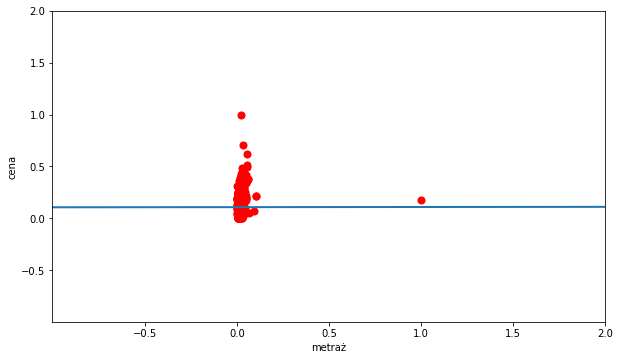

In [20]:
fig = plot_data(Xo, yo, xlabel=u'metraż', ylabel=u'cena')
theta_start = np.matrix([0.0, 0.0]).reshape(2, 1)
theta, logs = gradient_descent(cost, gradient, theta_start, Xo, yo, alpha=0.01)
plot_regression(fig, h_linear, theta, Xo)

Na powyższym przykładzie obserwacja odstająca jawi sie jako pojedynczy punkt po prawej stronie wykresu. Widzimy, że otrzymana krzywa regresji zamiast odwzorowywać ogólny trend, próbuje „dopasować się” do tej pojedynczej obserwacji.

Dlatego taką obserwację należy usunąć ze zbioru danych (zobacz ponizej).

In [21]:
# Odrzućmy obserwacje odstające
alldata_no_outliers = [
    (index, item) for index, item in alldata.iterrows() 
    if item.price > 100 and item.sqrMetres > 10]

alldata_no_outliers = alldata.loc[(alldata['price'] > 100) & (alldata['sqrMetres'] > 100)]

In [22]:
data = np.matrix(alldata_no_outliers[['price', 'sqrMetres']])

m, n_plus_1 = data.shape
n = n_plus_1 - 1
Xn = data[:, 0:n]

Xo = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n + 1)
yo = np.matrix(data[:, -1]).reshape(m, 1)

Xo /= np.amax(Xo, axis=0)
yo /= np.amax(yo, axis=0)

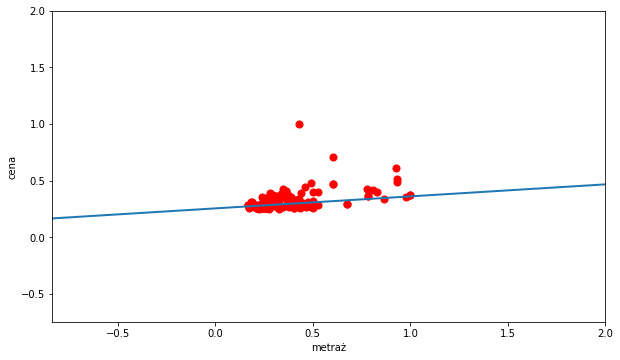

In [23]:
fig = plot_data(Xo, yo, xlabel=u'metraż', ylabel=u'cena')
theta_start = np.matrix([0.0, 0.0]).reshape(2, 1)
theta, logs = gradient_descent(cost, gradient, theta_start, Xo, yo, alpha=0.01)
plot_regression(fig, h_linear, theta, Xo)

Na powyższym wykresie widać, że po odrzuceniu obserwacji odstających otrzymujemy dużo bardziej „wiarygodną” krzywą regresji.